# Interacciones libres

Una población de corruptos y honestos.


Justo antes de interactuar con otros agentes actualizan su estado, corrupto u honesto. Si son agentes encubiertos su estado siempre es ser honestos. Si no, usan su experiencia para establecer su estado. Si no tienen experiencia eligen al azar.

Cada interacción les suma el valor de la función de utilidad. Con la matriz configurada como el dilema del prisionero, las utilidades son siempre negativas, se gana pasando menos tiempo en prisión.

Tras cada interacción acumulan experiencia, o sea: recuerdan los estados de los agentes con los que van interactuando.

In [1]:
import random

class Agente:
    
    def __init__(self):
        self.estado = random.choice(['honesto', 'corrupto'])
        self.experiencia = []
        self.encubierto = False
        self.encarcelado = False
        self.utilidad = 0
        self.visto_encarcelados = 0
        self.ejemplo_persuasivo = 2
    
    def decide_recordando(self):
        if self.encubierto:
            self.estado = 'honesto'
        elif self.visto_encarcelados >= self.ejemplo_persuasivo:
            self.estado = 'honesto'
        elif self.experiencia:
            self.estado = random.choice(self.experiencia)
        else:
            self.estado = random.choice(['honesto', 'corrupto'])
            

La interacción entre dos agentes está dada por el Dilema del Prisionero.

In [2]:
def interaccion(a, b):
    if (a.estado == 'honesto'
        and b.estado == 'honesto'):
        a.utilidad += -1
        b.utilidad += -1
    elif (a.estado == 'honesto'
         and b.estado == 'corrupto'):
        a.utilidad += -3
        b.utilidad += 0
    elif (a.estado == 'corrupto'
         and b.estado == 'honesto'):
        a.utilidad += 0
        b.utilidad += -3
    elif (a.estado == 'corrupto'
         and b.estado == 'corrupto'):
        a.utilidad += -2
        b.utilidad += -2
        
    # la interacción le da experiencia a los agentes
    a.experiencia.append(b.estado)
    b.experiencia.append(a.estado)


## Ejemplo

Examinemos a un par de agentes, A y B.

In [3]:
A = Agente()
B = Agente()

# Los forzamos a ser honestos justo antes de interactuar.
A.estado = 'honesto'
B.estado = 'honesto'

interaccion(A, B)

# De acuerdo con la matriz de pago, tras la interacción 
# cada uno se lleva -1
A.utilidad, B.utilidad

(-1, -1)

In [4]:
# la experiencia de ambos es una lista de un sólo 
# elemento, pues sólo han interactuado una vez
A.experiencia, B.experiencia

(['honesto'], ['honesto'])

In [5]:
# Aqui un agente que ha tenido muy malas experiencias:
A.experiencia = ['corrupto', 'corrupto', 'corrupto', 'corrupto']

# para actualizar el estado de un agente hay que ejecutar este método
A.decide_recordando()

A.estado

'corrupto'

## Población de agentes

In [6]:
# una población de 100 agentes
N = 100
# simularemos por 100 iteraciones
iteraciones = 100

from itertools import combinations

# creamos N agentes
agentes = [Agente() for n in range(N)]

t_estado = []  # para registrar proporción de corruptos/honestos
t_u = [] # para registrar utilidades de agentes por t

# iterar
for t in range(iteraciones):
    # todos interactuan con todos, en cada iteración
    for par in combinations(agentes, 2):
        # antes de interactuar establecen su estado
        par[0].decide_recordando()
        par[1].decide_recordando()
        
        interaccion(*par)
        
    # cuenta por estado
    t_estado.append(len([a for a in agentes if a.estado == 'honesto']))
    # guarda la utilidad de cada agente en t
    t_u.append([a.utilidad for a in agentes])


¿Cuál es el estado global del sistema (corrupto u honesto)?

Text(0,0.5,'honestos')

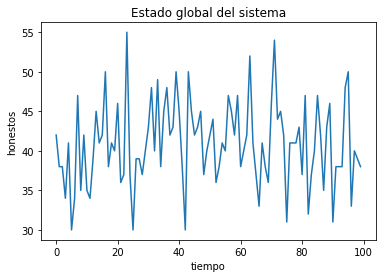

In [7]:
# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

plt.plot(t_estado)
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('honestos')

Text(0,0.5,'utilidad')

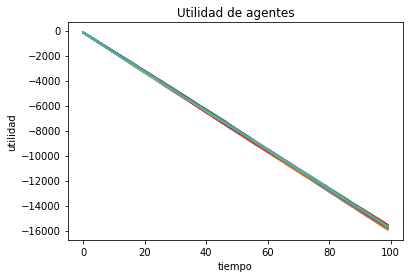

In [8]:
fig = plt.plot(t_u)
plt.title('Utilidad de agentes')
plt.xlabel('tiempo')
plt.ylabel('utilidad')

En cada iteración interactúan todas las combinaciones de pares de agentes, por eso sus utilidades crecen tanto al cabo de 100 iteraciones.

# Interacciones vigiladas

Ahora supongamos que hay una densidad inicial de agentes encubiertos incorruptibles, que cuando interactúan con un corrupto, lo encarcelan.

Las preferencias de los agentes cambian dependiendo de cuántos agentes con los que quieren interactuar están en la cárcel, de tal manera que si alcanzan un límite, prefieren ser honestos. Este parámetro se llama "ejemplo_persuasivo" y es un atributo de cada agente.

In [9]:
def interaccion_vigilada(a, b):

    # agentes encubiertos patrullan
    if a.encubierto:
        if b.estado == 'corrupto':
            b.encarcelado = True

    if b.encubierto:
        if a.estado == 'corrupto':
            a.encarcelado = True
            
    # ver que los dos sean libres
    libres = True
    
    # agentes cuentan ejemplos de encarcelamientos
    if a.encarcelado:
        b.visto_encarcelados += 1
        libres = False
        
    if b.encarcelado:
        a.visto_encarcelados += 1
        libres = False
        
    # sólo agentes libres interactuan
    if libres:
        # mismo dilema del prisionero
        if (a.estado == 'honesto'
            and b.estado == 'honesto'):
            a.utilidad += -1
            b.utilidad += -1
        elif (a.estado == 'honesto'
             and b.estado == 'corrupto'):
            a.utilidad += -3
            b.utilidad += 0
        elif (a.estado == 'corrupto'
             and b.estado == 'honesto'):
            a.utilidad += 0
            b.utilidad += -3
        elif (a.estado == 'corrupto'
             and b.estado == 'corrupto'):
            a.utilidad += -2
            b.utilidad += -2
            
        a.experiencia.append(b.estado)
        b.experiencia.append(a.estado)

## Experimento
Para que una población de 100 agentes sea mayormente honesta ¿cuál es la densidad mínima de honestos incorruptibles, si los agentes tienen ejemplo persuasivo de 2 encarcelados?

In [10]:
# de 100 agentes, 10 honestos, 1000 iteraciones
N = 100
encubiertos = 10
iteraciones = 1000

# creamos N agentes
agentes = [Agente() for n in range(N)]

# reclutamos encubiertos
for n in range(encubiertos):
    agentes[n].encubierto=True

t_estado = []
t_u = []
t_libres = []  # para contar agentes libres en la población
for t in range(iteraciones):

    # interactua un par cualquiera
    A, B = random.sample(agentes, 2)

    A.decide_recordando()
    B.decide_recordando()
    interaccion_vigilada(A, B)
        
    # cuenta por estado
    t_estado.append(len([a for a in agentes if a.estado == 'honesto']))
    t_u.append([a.utilidad for a in agentes])
    t_libres.append(len([a for a in agentes if a.encarcelado == False]))


Text(0,0.5,'honestos y libres')

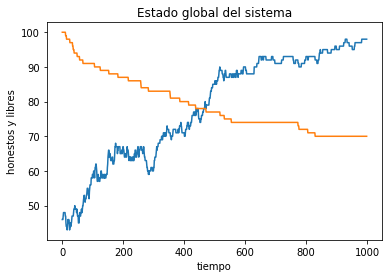

In [11]:
plt.plot(t_estado)
plt.plot(t_libres)
plt.title('Estado global del sistema')
plt.xlabel('tiempo')
plt.ylabel('honestos y libres')

Text(0,0.5,'utilidad')

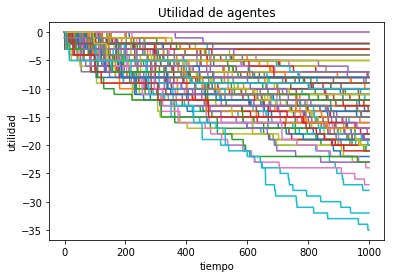

In [12]:
fig = plt.plot(t_u)
plt.title('Utilidad de agentes')
plt.xlabel('tiempo')
plt.ylabel('utilidad')

A diferencia del caso anterior, en cada iteración interactúan sólo dos agentes, por eso las utilidades no son tan grandes.